In [7]:
!pip install -qq gym==0.23.0

In [1]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
from maze_env import Maze
from utils import plot_policy, plot_action_values, test_agent


%matplotlib inline

c:\Users\mohdm\AppData\Local\Programs\Python\Python313\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


### Initializing the environment

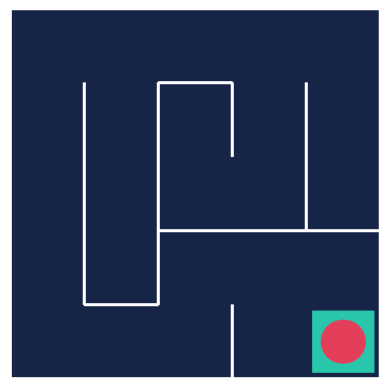

In [2]:
env = Maze()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)


In [3]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s,s)$

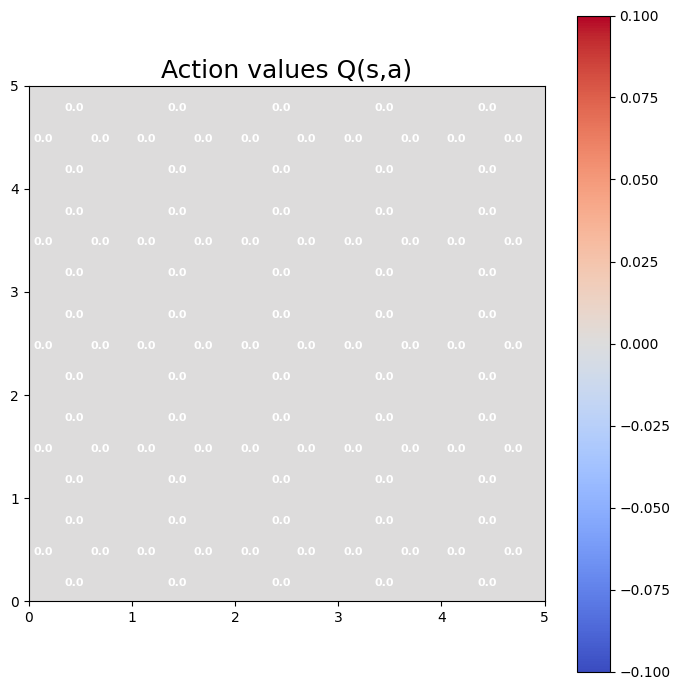

In [4]:
action_values = np.zeros(shape=(5, 5, 4))  # 5 x 5 x 4 because 25 states and 4 actions

plot_action_values(action_values)

## Define the policy $\pi(s)$

In [5]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

### Test the policy with state (0,0)

In [6]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 0


### Plot the Policy

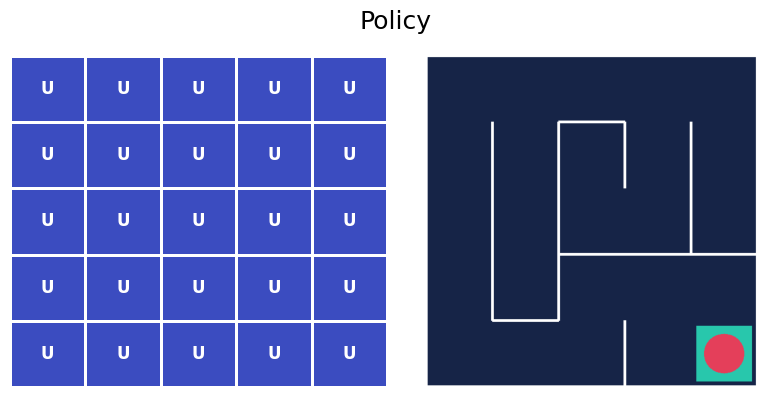

In [7]:
plot_policy(action_values, frame)

## Implement the algorithm

In [8]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):

    sa_returns = {}

    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G

            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [9]:
on_policy_mc_control(policy, action_values, episodes=10000)

## Show Results

### Show resulting value table $Q(s,s)$

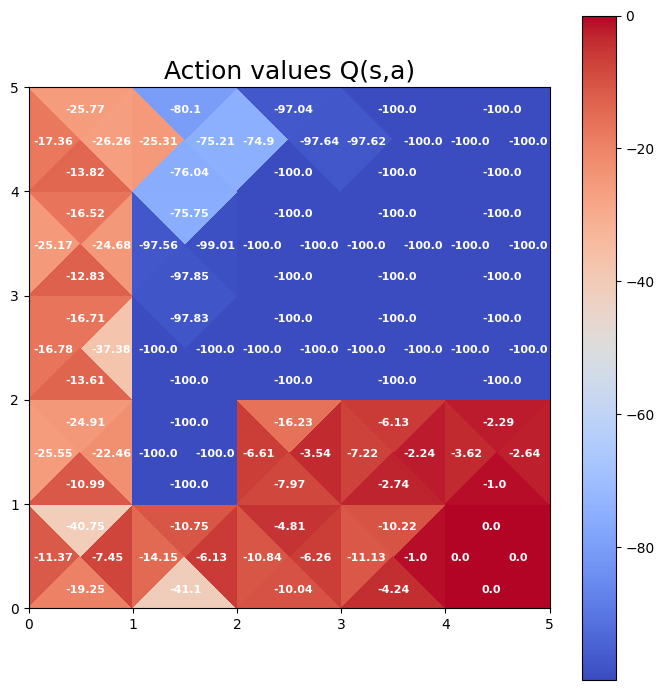

In [10]:
plot_action_values(action_values)

Each small triangle inside a grid cell shows the expected reward (Q-value) for taking a specific action from that state.

## Show resulting value policy $\pi(.|s)$

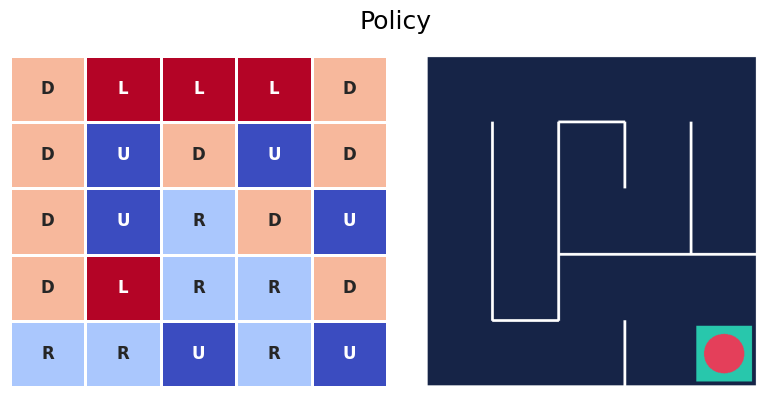

In [11]:
plot_policy(action_values, frame)

## Test the agent

In [ ]:
test_agent(env, policy)

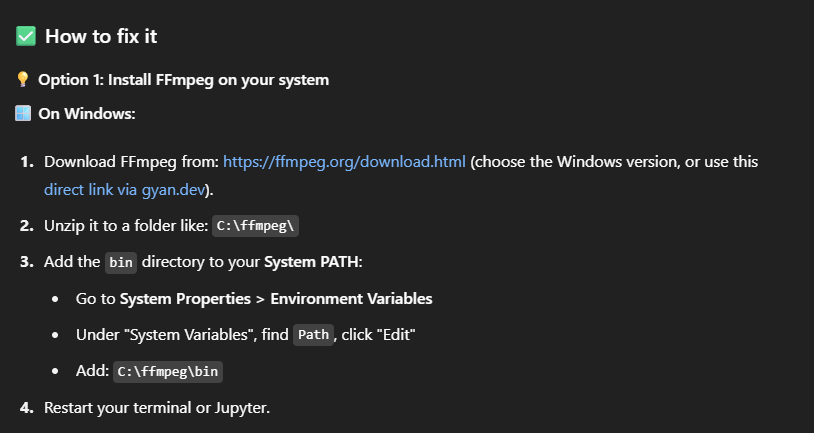